In [8]:
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv("data/API_POL_DS2_en_csv_v2_6302692.csv",skiprows=3)

In [10]:
df = df.drop(columns=["Country Name", "Country Code", "Indicator Code", "Unnamed: 67"])
df = df.set_index("Indicator Name")

In [11]:
# list(df.index)

In [12]:
missing_values_per_column = df.isnull().sum(axis=1)

selected_columns = missing_values_per_column[missing_values_per_column < 2].index
# display(df.loc[selected_columns])
df_filtered = df.loc[selected_columns]

In [13]:
selected_dataframe = df.loc[["GNI per capita (constant 2015 US$)", "GDP (current US$)", "Inflation, consumer prices (annual %)", "International tourism, receipts (current US$)","Merchandise trade (% of GDP)"]]

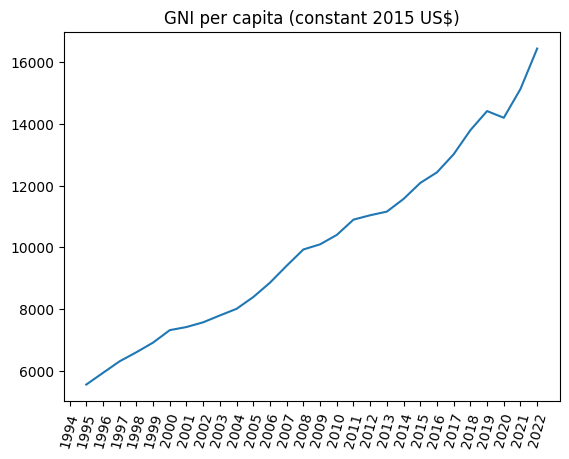

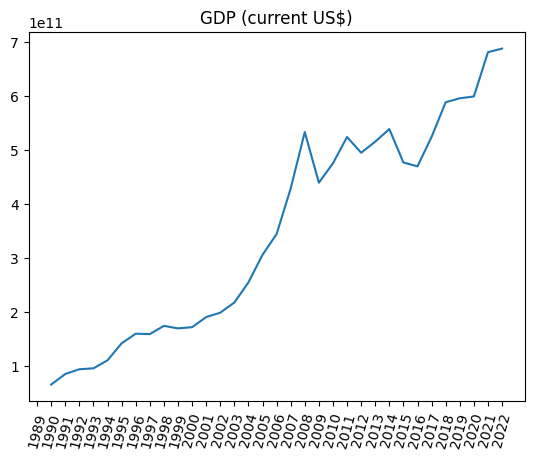

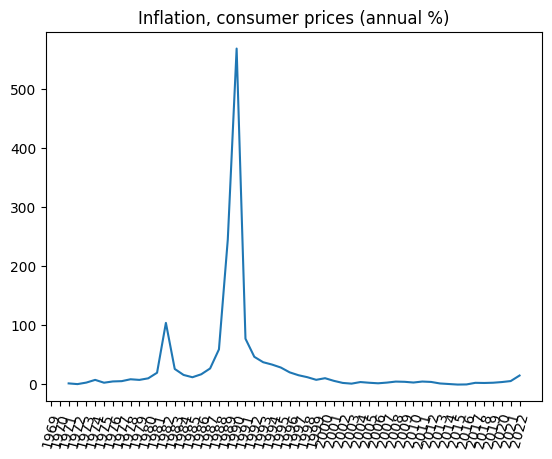

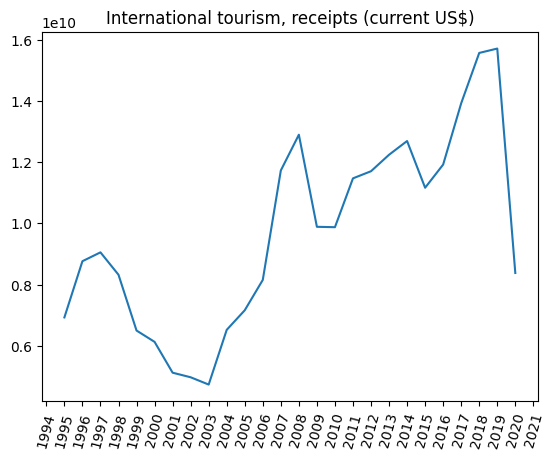

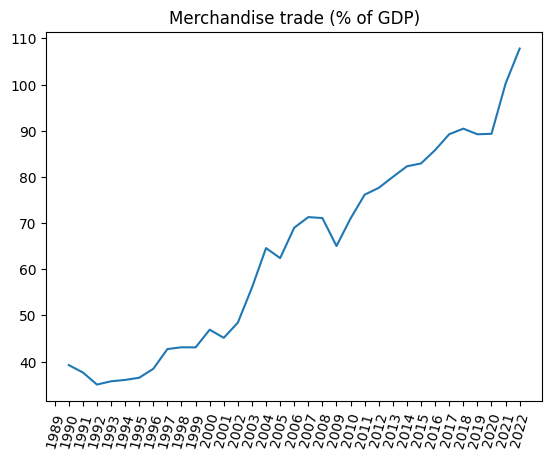

In [14]:
for index, row in selected_dataframe.iterrows():
    plt.plot(row, label=f'Row {index}')
    plt.title(f'{index}')
    plt.xticks(rotation=75)
    plt.show()

In [27]:
columns_until_2004 = [str(year) for year in range(1995, 2005)]
columns_after_2004 = [str(year) for year in range(2005, 2022)]
data_before_eu = selected_dataframe[columns_until_2004]
data_after_eu = selected_dataframe[columns_after_2004]

In [24]:
data_before_eu

,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004
Indicator Name,,,,,,,,,,
GNI per capita (constant 2015 US$),5.549344e+03,5.928386e+03,6.304815e+03,6.597110e+03,6.910447e+03,7.314394e+03,7.415765e+03,7.569114e+03,7.791231e+03,8.006478e+03
GDP (current US$),1.422938e+11,1.601932e+11,1.593582e+11,1.746858e+11,1.700307e+11,1.722205e+11,1.909055e+11,1.990704e+11,2.178287e+11,2.551073e+11
"Inflation, consumer prices (annual %)",2.795139e+01,1.979497e+01,1.491316e+01,1.159786e+01,7.154073e+00,9.900175e+00,5.408335e+00,1.905282e+00,6.827014e-01,3.382647e+00
"International tourism, receipts (current US$)",6.927000e+09,8.764000e+09,9.053000e+09,8.321000e+09,6.498000e+09,6.128000e+09,5.121000e+09,4.971000e+09,4.733000e+09,6.521000e+09
Merchandise trade (% of GDP),3.650546e+01,3.843795e+01,4.270882e+01,4.309738e+01,4.307576e+01,4.690268e+01,4.514380e+01,4.844114e+01,5.602293e+01,6.457794e+01


In [26]:
data_before_eu.T.corr()

Indicator Name,GNI per capita (constant 2015 US$),GDP (current US$),"Inflation, consumer prices (annual %)","International tourism, receipts (current US$)",Merchandise trade (% of GDP)
Indicator Name,,,,,
GNI per capita (constant 2015 US$),1.000000,0.875948,-0.950470,-0.718302,0.871194
GDP (current US$),0.875948,1.000000,-0.786997,-0.510474,0.970463
"Inflation, consumer prices (annual %)",-0.950470,-0.786997,1.000000,0.654349,-0.757871
"International tourism, receipts (current US$)",-0.718302,-0.510474,0.654349,1.000000,-0.475361
Merchandise trade (% of GDP),0.871194,0.970463,-0.757871,-0.475361,1.000000


In [45]:
data_for_analysis = data_before_eu.loc[["GDP (current US$)"]].T.reset_index()
data_for_analysis["GDP (current US$)"] = data_for_analysis["GDP (current US$)"]
data_for_analysis

Indicator Name,index,GDP (current US$)
0,1995,1.422938e+11
1,1996,1.601932e+11
2,1997,1.593582e+11
3,1998,1.746858e+11
4,1999,1.700307e+11
5,2000,1.722205e+11
6,2001,1.909055e+11
7,2002,1.990704e+11
8,2003,2.178287e+11
9,2004,2.551073e+11


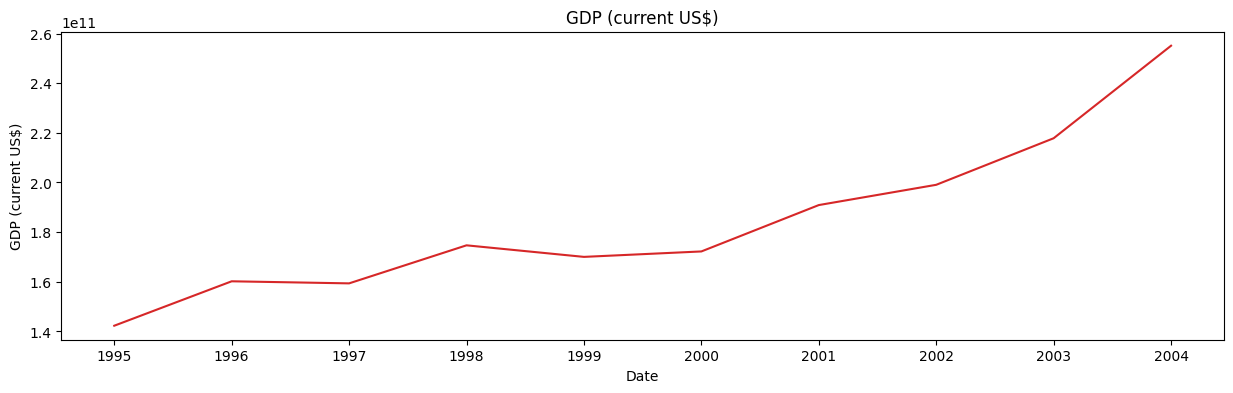

In [46]:
plt.figure(figsize=(15,4), dpi=100)
plt.plot(data_for_analysis["index"], data_for_analysis["GDP (current US$)"], color='tab:red')
plt.gca().set(title=f"{data_for_analysis["GDP (current US$)"].name}", xlabel="Date", ylabel=data_for_analysis["GDP (current US$)"].name)
plt.show()

In [38]:
data_for_analysis["GDP (current US$)"].name

'GDP (current US$)'